### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [7]:
data = pd.read_csv('data/coupons.csv')

In [8]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [9]:
# Investigate Dataset

# Get data Info
data_info = data.info()
data_info


# Get data description
data_describe = data.describe()
data_describe

# Check for na in data
data_na = data.isna().sum()
data_na

# Check for isnull count columnwise
data_isnulls_count = data.isnull().sum()
data_isnulls_count



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [10]:
#Check car unique values
print( "Unique car values:", data['car'].unique() )

# This data seems to be car type.  However, it doesn't look like it was collected consistently.  Let's drop this column.
cleaned_data = data.drop('car', axis=1)

# Check Bar column unique values
cleaned_data["Bar"].unique()

#Notice nan is a string and not NaN try to replace with np.NaN and then drop
cleaned_data['Bar'] = cleaned_data['Bar'].replace('nan', np.nan)
cleaned_data = cleaned_data.dropna(subset=['Bar'])

cleaned_data


Unique car values: [nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [11]:
#After cleaning -- consider cleaned_data

# Get total obeservations count
total_observations_after_cleaning = cleaned_data.shape[0]
print(f"Total observations after cleaning: {total_observations_after_cleaning}")

# Get accepted count. 
accepted_after_cleaning = (cleaned_data['Y'] == 1).sum()
print(f"Accepted count after cleaning: {accepted_after_cleaning}")

# Proportion
proportion_accepted_after_cleaning = accepted_after_cleaning / total_observations_after_cleaning
proportion_accepted_after_cleaning
print(f"Proportion of accepted coupons (based on cleaned data): {proportion_accepted_after_cleaning:.2%}")


Total observations after cleaning: 12577
Accepted count after cleaning: 7155
Proportion of accepted coupons (based on cleaned data): 56.89%


5. Use a bar plot to visualize the `coupon` column.

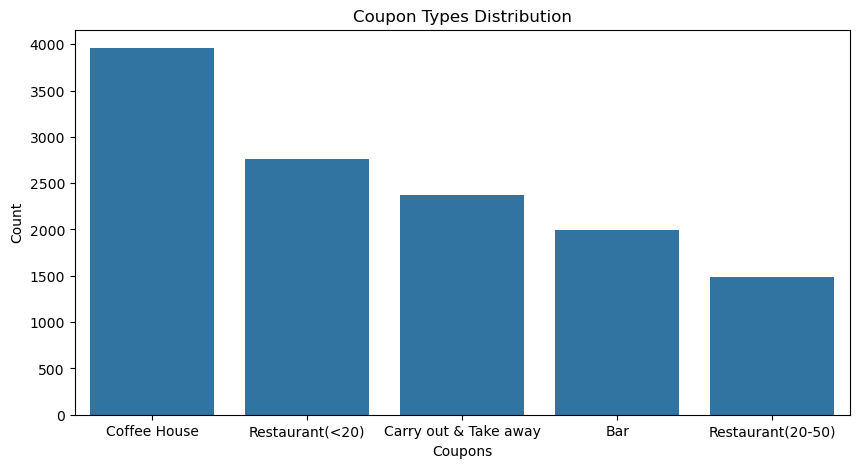

In [12]:
# Plot the count of each unique value in the coupon column.
plt.figure(figsize=(10, 5))
sns.barplot(cleaned_data['coupon'].value_counts() )

plt.title('Coupon Types Distribution')
plt.xlabel('Coupons')
plt.ylabel('Count')
plt.show()

6. Use a histogram to visualize the temperature column.

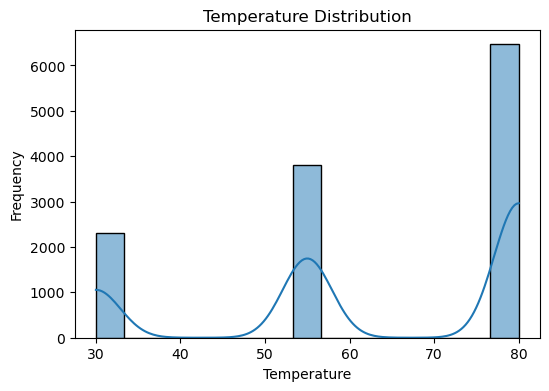

In [13]:
plt.figure(figsize=(6, 4))
sns.histplot(cleaned_data['temperature'], bins=15, kde=True)

plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

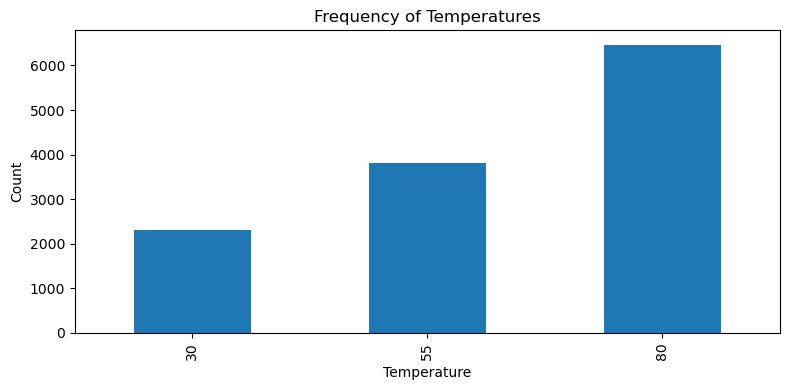

In [14]:
# Count how often each temperature occurs
temp_counts = cleaned_data['temperature'].value_counts().sort_index()

# Plot as bar chart
temp_counts.plot(kind='bar', figsize=(8, 4), title='Frequency of Temperatures')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

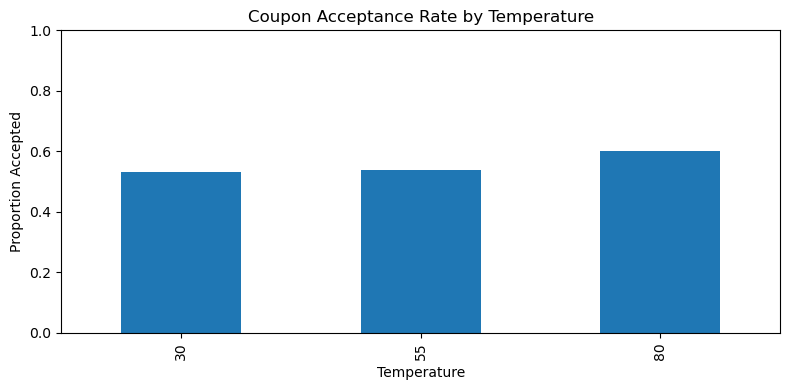

In [15]:
# Mean acceptance (Y) per temperature
temp_acceptance = cleaned_data.groupby('temperature')['Y'].mean()

# Plot
temp_acceptance.plot(kind='bar', figsize=(8, 4), title='Coupon Acceptance Rate by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Proportion Accepted')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

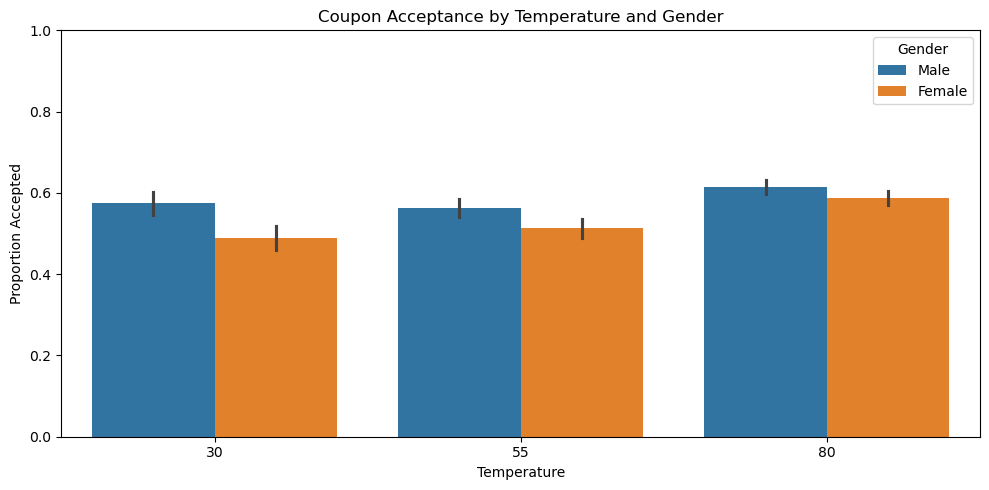

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(x='temperature', y='Y', hue='gender', data=cleaned_data)

plt.title('Coupon Acceptance by Temperature and Gender')
plt.xlabel('Temperature')
plt.ylabel('Proportion Accepted')
plt.ylim(0, 1)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

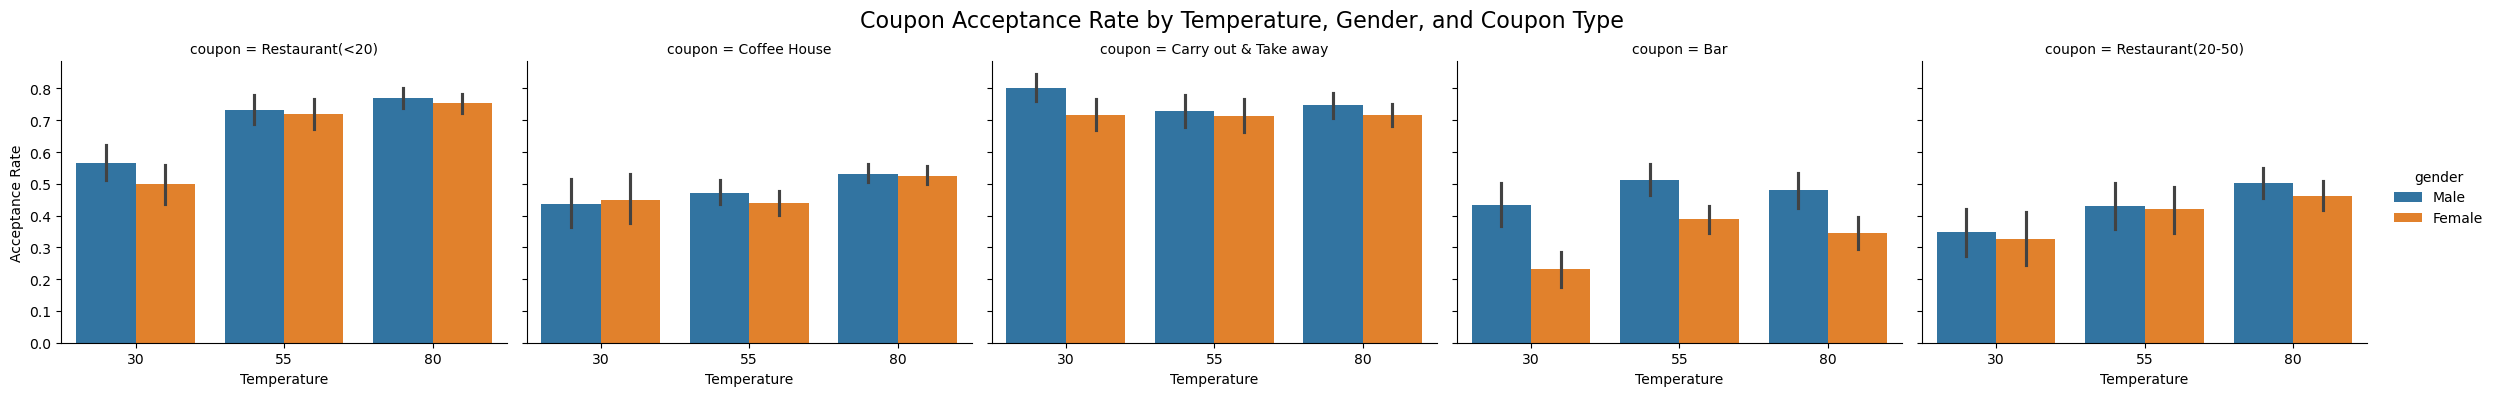

In [17]:
# Create a displot with col coupon,
g = sns.catplot(
    data=cleaned_data,
    x='temperature',
    y='Y',
    hue='gender',
    col='coupon',
    kind='bar',
    height=4,
    aspect=1.2
)

# Spacing to avoid overlap
plt.subplots_adjust(top=0.85)

g.set_axis_labels("Temperature", "Acceptance Rate")

# Main title to the entire plot
plt.suptitle("Coupon Acceptance Rate by Temperature, Gender, and Coupon Type", fontsize=16)

# Show the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [18]:
# Calculate total bar coupons
total_bar_coupons = cleaned_data.query("coupon=='Bar'")
total_bar_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [19]:
#Calculate accepted Bar coupons
accepted_bar_coupons = cleaned_data.query("coupon =='Bar' and Y ==1")

# Calculate the proportion
proportion = accepted_bar_coupons.shape[0] / total_bar_coupons.shape[0]

print(f"Proportion of bar coupons accepted: {proportion:.2%}")


Proportion of bar coupons accepted: 41.03%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [20]:
#To verify only: Get bar and Y subest data 
accepted_bar_Y_subset = accepted_bar_coupons[["Bar", "Y"]]
accepted_bar_Y_subset["Bar"].unique()


# Define bar frequency groups
low_freq = ['never' , 'less1', '1~3']
high_freq = ['4~8', 'gt8']

# Filter dataset where Bar value is known and valid
valid_bar_data = cleaned_data[cleaned_data['Bar'].isin(low_freq + high_freq)]

# Low-frequency group acceptance rate
low_group = valid_bar_data.query("Bar in @low_freq")
low_acceptance_rate = low_group['Y'].mean()

# High-frequency group acceptance rate
high_group = valid_bar_data[valid_bar_data['Bar'].isin(high_freq)]
high_acceptance_rate = high_group['Y'].mean()

# Results
print(f"Acceptance rate (3 or fewer times/month): {low_acceptance_rate:.2%}")
print(f"   Note: When excluding people who never went to bar, the Acceptance rate of people who went (3 or fewer times/month) : 58.79%")
print(f"Acceptance rate (more than 3 times/month): {high_acceptance_rate:.2%}")



Acceptance rate (3 or fewer times/month): 56.21%
   Note: When excluding people who never went to bar, the Acceptance rate of people who went (3 or fewer times/month) : 58.79%
Acceptance rate (more than 3 times/month): 62.25%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [21]:
#To verify only: resultant subset
bar_age_subset = cleaned_data[["Bar","age"]]
bar_age_subset["age"].unique()


# Drivers who go to bars > 1/month and are over 25
bar_visits_freq = ['4~8', 'gt8']
group1 = cleaned_data[
    (cleaned_data['Bar'].isin(bar_visits_freq)) &
    (cleaned_data['age'].isin(['26', '31', '36', '41', '46', '50plus']))
]

# Group 2: everyone else
group2 = cleaned_data[~cleaned_data.index.isin(group1.index)]

# Acceptance rates
rate_group1 = group1['Y'].mean()
rate_group2 = group2['Y'].mean()

print(f"Group 1 (Bar >1/month & Age >25): {rate_group1:.2%}")
print(f"Group 2 (Everyone else): {rate_group2:.2%}")


Group 1 (Bar >1/month & Age >25): 61.67%
Group 2 (Everyone else): 56.47%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [22]:
#To verify only: resultnat data
passanger_occupation_subset = cleaned_data[["passanger","occupation"]]
passanger_occupation_subset["passanger"].unique()

# Bar visit frequency > 1/month
bar_visits_freq = ['4~8', 'gt8']

# Exclude these occupation and passenger types
excluded_occupations = ['farming', 'fishing', 'forestry']
excluded_passengers = ['Kid(s)']

# Group 1: drivers meeting all 3 conditions
group1 = cleaned_data[
    (cleaned_data['Bar'].isin(bar_visits_freq)) &
    (~cleaned_data['passanger'].isin(excluded_passengers)) &
    (~cleaned_data['occupation'].isin(excluded_occupations))
]

# Group 2: everyone else
group2 = cleaned_data[~cleaned_data.index.isin(group1.index)]

# Acceptance rates
rate_group1 = group1['Y'].mean()
rate_group2 = group2['Y'].mean()

print(f"Group 1 (Bar >1/month & No kid passenger & Not in farming/fishing/forestry): {rate_group1:.2%}")
print(f"Group 2 (Everyone else): {rate_group2:.2%}")


Group 1 (Bar >1/month & No kid passenger & Not in farming/fishing/forestry): 62.24%
Group 2 (Everyone else): 56.23%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [23]:
#To verify only :  checck marital status unique values
bar_visits_freq = ['4~8', 'gt8'] 
cleaned_data["maritalStatus"].unique()

#To verify only :  checck income unique values
cleaned_data["income"].unique()

# Condition sets
bar_freq = ['4~8', 'gt8']
cheap_restaurant_freq = ['4~8', 'gt8']
under_30_age = ['below21', '21', '26']

# Income brackets under $50K
low_income_brackets = [
    'Less than $12500',
    '$12500 - $24999',
    '$25000 - $37499',
    '$37500 - $49999'
]

# Condition 1: Bar > 1/month, Not a kid passenger, Not widowed
cond1 = (
    (cleaned_data['Bar'].isin(bar_freq)) &
    (cleaned_data['passanger'] != 'Kid(s)') &
    (cleaned_data['maritalStatus'] != 'Widowed')
)

# Condition 2: Bar > 1/month and under 30
cond2 = (
    (cleaned_data['Bar'].isin(bar_freq)) &
    (cleaned_data['age'].isin(under_30_age))
)

# Condition 3: Cheap restaurant > 4/month and income < $50K
cond3 = (
    (cleaned_data['RestaurantLessThan20'].isin(cheap_restaurant_freq)) &
    (cleaned_data['income'].isin(low_income_brackets))
)

# Individual group filtering
group_cond1 = cleaned_data[cond1]
group_cond2 = cleaned_data[cond2]
group_cond3 = cleaned_data[cond3]

# Acceptance rates
print(f"Acceptance Rate (go to bars more than once a month, had passengers that were not a kid, and were not widowed): {group_cond1['Y'].mean():.2%}")
print(f"Acceptance Rate (go to bars more than once a month and are under the age of 30): {group_cond2['Y'].mean():.2%}")
print(f"Acceptance Rate (go to cheap restaurants more than 4 times a month and income is less than 50K): {group_cond3['Y'].mean():.2%}")



Acceptance Rate (go to bars more than once a month, had passengers that were not a kid, and were not widowed): 62.24%
Acceptance Rate (go to bars more than once a month and are under the age of 30): 64.83%
Acceptance Rate (go to cheap restaurants more than 4 times a month and income is less than 50K): 60.26%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Drivers who are socially active, younger, and/or more budget-conscious are more likely to accept bar coupons.

Supporting insights:
Younger drivers (under 30) show the highest acceptance rate (64.83%), suggesting that age correlates positively with coupon acceptance.

Drivers who frequent bars regularly and are not tied down by family constraints (e.g., no kids in the car) are also more likely to accept.

Low-income, high-frequency restaurant-goers also show a relatively high acceptance rate, which implies cost sensitivity or a value-seeking behavior.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  